In [1]:
# Librairies de calcul
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import decomposition, preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
Complet_df = pd.read_csv("Complet_df.csv")

In [3]:
Complet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Zone                       166 non-null    object 
 1   PIB/hab                    166 non-null    float64
 2   Indice_prod_viande_poulet  166 non-null    float64
 3   Dispo_int_volaille t/hab   166 non-null    float64
 4   import_volaille t/hab      166 non-null    float64
 5   production_volaille t/hab  166 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.9+ KB


In [4]:
#suppression de la colonne _merge

#Complet_df = Complet_df.drop("_merge", axis=1)

In [5]:
#la colonne Zone en index
Complet_df = Complet_df.set_index('Zone')
Complet_df

,PIB/hab,Indice_prod_viande_poulet,Dispo_int_volaille t/hab,import_volaille t/hab,production_volaille t/hab
Zone,,,,,
Afghanistan,520.616409,73.03,0.001570,0.000799,0.000771
Afrique du Sud,6121.876572,97.12,0.037152,0.009016,0.029241
Albanie,4514.204908,157.14,0.016296,0.013175,0.004507
Algérie,4109.696001,103.17,0.006693,0.000048,0.006644
Allemagne,44651.829102,99.19,0.021038,0.010187,0.018316
...,...,...,...,...,...
Venezuela (République bolivarienne du),8432.288335,60.50,0.021291,0.000850,0.020406
Viet Nam,2365.521494,113.57,0.012748,0.003076,0.009704
Yémen,745.087677,94.82,0.008838,0.002802,0.006036


In [6]:
#Ayant une valeur aberrante en indice production de viande de poulet nous supprimons de l'analyse le lesotho
Complet_df = Complet_df.drop('Lesotho')

In [7]:
# transformer les données en array numpy
X = Complet_df.values

In [8]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

**K-means:**

In [9]:
label_df = Complet_df

C:\Users\x muscador x\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


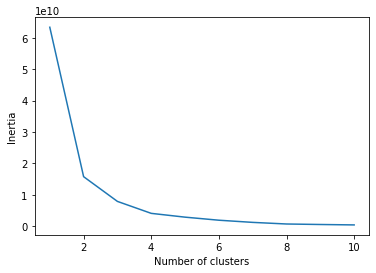

In [10]:

#Determination du nombre optimum de clusters pour le K-means: methode du coude:

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(label_df)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

La méthode du "coude":  Cette méthode indique plutôt que le nombre de cluster optimal est entre 4 et 5.
*La méthode du coude (ou "elbow method" en anglais) est un outil couramment utilisé pour choisir le nombre optimal de clusters pour un algorithme de clustering tel que K-means. Le principe de cette méthode est de tracer la somme des distances des points de données aux centroïdes des clusters (appelée "inertie") en fonction du nombre de clusters.*

*L'idée est de choisir le nombre de clusters pour lequel l'augmentation de l'inertie devient moins importante. Cela se traduit généralement par un coude sur le graphique, qui indique le nombre de clusters optimal.*

In [11]:
kmeans = KMeans(init="k-means++", n_clusters=5, n_init=4, random_state=0)

In [12]:
#predict the labels of clusters.
label = kmeans.fit_predict(label_df)
 
print(label)

[3 3 3 3 4 3 0 0 0 3 4 4 3 2 3 0 3 4 3 3 3 3 3 0 3 3 3 3 3 4 0 4 1 3 2 3 3
 0 3 0 3 4 3 3 3 2 3 2 0 3 4 3 0 3 4 2 3 3 3 3 0 0 3 3 3 3 3 3 0 3 3 3 3 3
 1 1 4 2 3 2 3 3 3 3 3 2 0 3 3 0 1 3 3 0 3 3 2 3 0 3 3 3 3 3 3 3 3 3 3 3 1
 2 4 0 3 3 0 3 4 3 0 0 0 3 2 3 3 3 3 0 2 3 0 0 3 3 3 3 3 3 0 0 3 3 4 1 3 3
 3 0 3 3 3 0 3 3 0 3 0 3 3 3 3 3 3]


In [13]:
label_df['label'] = label
label_df

,PIB/hab,Indice_prod_viande_poulet,Dispo_int_volaille t/hab,import_volaille t/hab,production_volaille t/hab,label
Zone,,,,,,
Afghanistan,520.616409,73.03,0.001570,0.000799,0.000771,3
Afrique du Sud,6121.876572,97.12,0.037152,0.009016,0.029241,3
Albanie,4514.204908,157.14,0.016296,0.013175,0.004507,3
Algérie,4109.696001,103.17,0.006693,0.000048,0.006644,3
Allemagne,44651.829102,99.19,0.021038,0.010187,0.018316,4
...,...,...,...,...,...,...
Venezuela (République bolivarienne du),8432.288335,60.50,0.021291,0.000850,0.020406,3
Viet Nam,2365.521494,113.57,0.012748,0.003076,0.009704,3
Yémen,745.087677,94.82,0.008838,0.002802,0.006036,3


In [14]:
label_df.loc[label_df['label']== 0]

,PIB/hab,Indice_prod_viande_poulet,Dispo_int_volaille t/hab,import_volaille t/hab,production_volaille t/hab,label
Zone,,,,,,
Antigua-et-Barbuda,15383.415188,60.94,0.073355,0.073355,0.000000,0
Arabie saoudite,20802.464299,116.42,0.043352,0.021812,0.018610,0
Argentine,14648.845969,104.41,0.044655,0.000182,0.049184,0
Barbade,17419.313704,104.39,0.059392,0.006987,0.052405,0
Brésil,9928.675992,104.97,0.048029,0.000014,0.068329,0
Chili,14998.813979,104.04,0.036382,0.008392,0.038548,0
Costa Rica,12225.577172,106.13,0.027071,0.003434,0.026869,0
Croatie,13439.243178,102.01,0.010758,0.005738,0.014583,0
Estonie,20406.691807,90.39,0.021980,0.015916,0.015159,0


In [15]:
label_df.loc[label_df['label']== 1]

,PIB/hab,Indice_prod_viande_poulet,Dispo_int_volaille t/hab,import_volaille t/hab,production_volaille t/hab,label
Zone,,,,,,
Chine - RAS de Macao,81043.968656,123.79,0.030518,0.036943,0.004819,1
Irlande,70568.302444,146.12,0.026929,0.020828,0.023142,1
Islande,73949.769216,114.59,0.029905,0.005981,0.029905,1
Luxembourg,111017.182246,155.40,0.018584,0.018584,0.000000,1
Norvège,75220.814442,103.74,0.019259,0.000378,0.019070,1
Suisse,83313.013992,104.85,0.015729,0.006031,0.010762,1


In [16]:
label_df.loc[label_df['label']== 2]

,PIB/hab,Indice_prod_viande_poulet,Dispo_int_volaille t/hab,import_volaille t/hab,production_volaille t/hab,label
Zone,,,,,,
Bahamas,32376.129780,98.19,0.068107,0.062868,0.015717,2
Chypre,26755.592900,109.86,0.032212,0.011868,0.021192,2
Émirats arabes unis,40644.804043,115.93,0.043427,0.045640,0.005059,2
Espagne,28137.441564,107.77,0.032092,0.004395,0.032478,2
France,38720.645922,101.05,0.024259,0.007804,0.026988,2
Italie,32333.550863,103.75,0.019333,0.001599,0.021673,2
Japon,38672.407740,103.32,0.018941,0.008384,0.017372,2
Koweït,29754.636332,114.08,0.046596,0.033776,0.013806,2
Malte,30850.173570,94.20,0.031968,0.020551,0.009134,2


In [17]:
label_df.loc[label_df['label']== 3]

,PIB/hab,Indice_prod_viande_poulet,Dispo_int_volaille t/hab,import_volaille t/hab,production_volaille t/hab,label
Zone,,,,,,
Afghanistan,520.616409,73.03,0.001570,0.000799,0.000771,3
Afrique du Sud,6121.876572,97.12,0.037152,0.009016,0.029241,3
Albanie,4514.204908,157.14,0.016296,0.013175,0.004507,3
Algérie,4109.696001,103.17,0.006693,0.000048,0.006644,3
Angola,4095.811686,105.37,0.010699,0.009290,0.001409,3
...,...,...,...,...,...,...
Venezuela (République bolivarienne du),8432.288335,60.50,0.021291,0.000850,0.020406,3
Viet Nam,2365.521494,113.57,0.012748,0.003076,0.009704,3
Yémen,745.087677,94.82,0.008838,0.002802,0.006036,3


In [18]:
label_df.loc[label_df['label']== 4]

,PIB/hab,Indice_prod_viande_poulet,Dispo_int_volaille t/hab,import_volaille t/hab,production_volaille t/hab,label
Zone,,,,,,
Allemagne,44651.829102,99.19,0.021038,0.010187,0.018316,4
Australie,57628.863849,108.17,0.047631,0.000651,0.051618,4
Autriche,47309.051637,108.21,0.019615,0.012472,0.016780,4
Belgique,44025.903247,111.47,0.013310,0.029598,0.040544,4
Canada,44906.748920,109.18,0.039012,0.004955,0.038577,4
Chine - RAS de Hong-Kong,46705.027813,97.71,0.038323,0.124139,0.003285,4
Danemark,57938.797728,99.20,0.029133,0.023202,0.030180,4
États-Unis d'Amérique,59921.674703,104.71,0.056188,0.000378,0.067410,4
Finlande,46385.550876,108.95,0.020140,0.002903,0.023406,4


In [19]:
#x_y = [0,1]
#display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), clusters=Complet_df['label'], marker="o")

In [20]:
#sns.pairplot(Complet_df, hue="label")

In [21]:
Complet_df = Complet_df.drop('label' , axis= 1)

Text(0.5, 1.0, 'Dendrogramme')

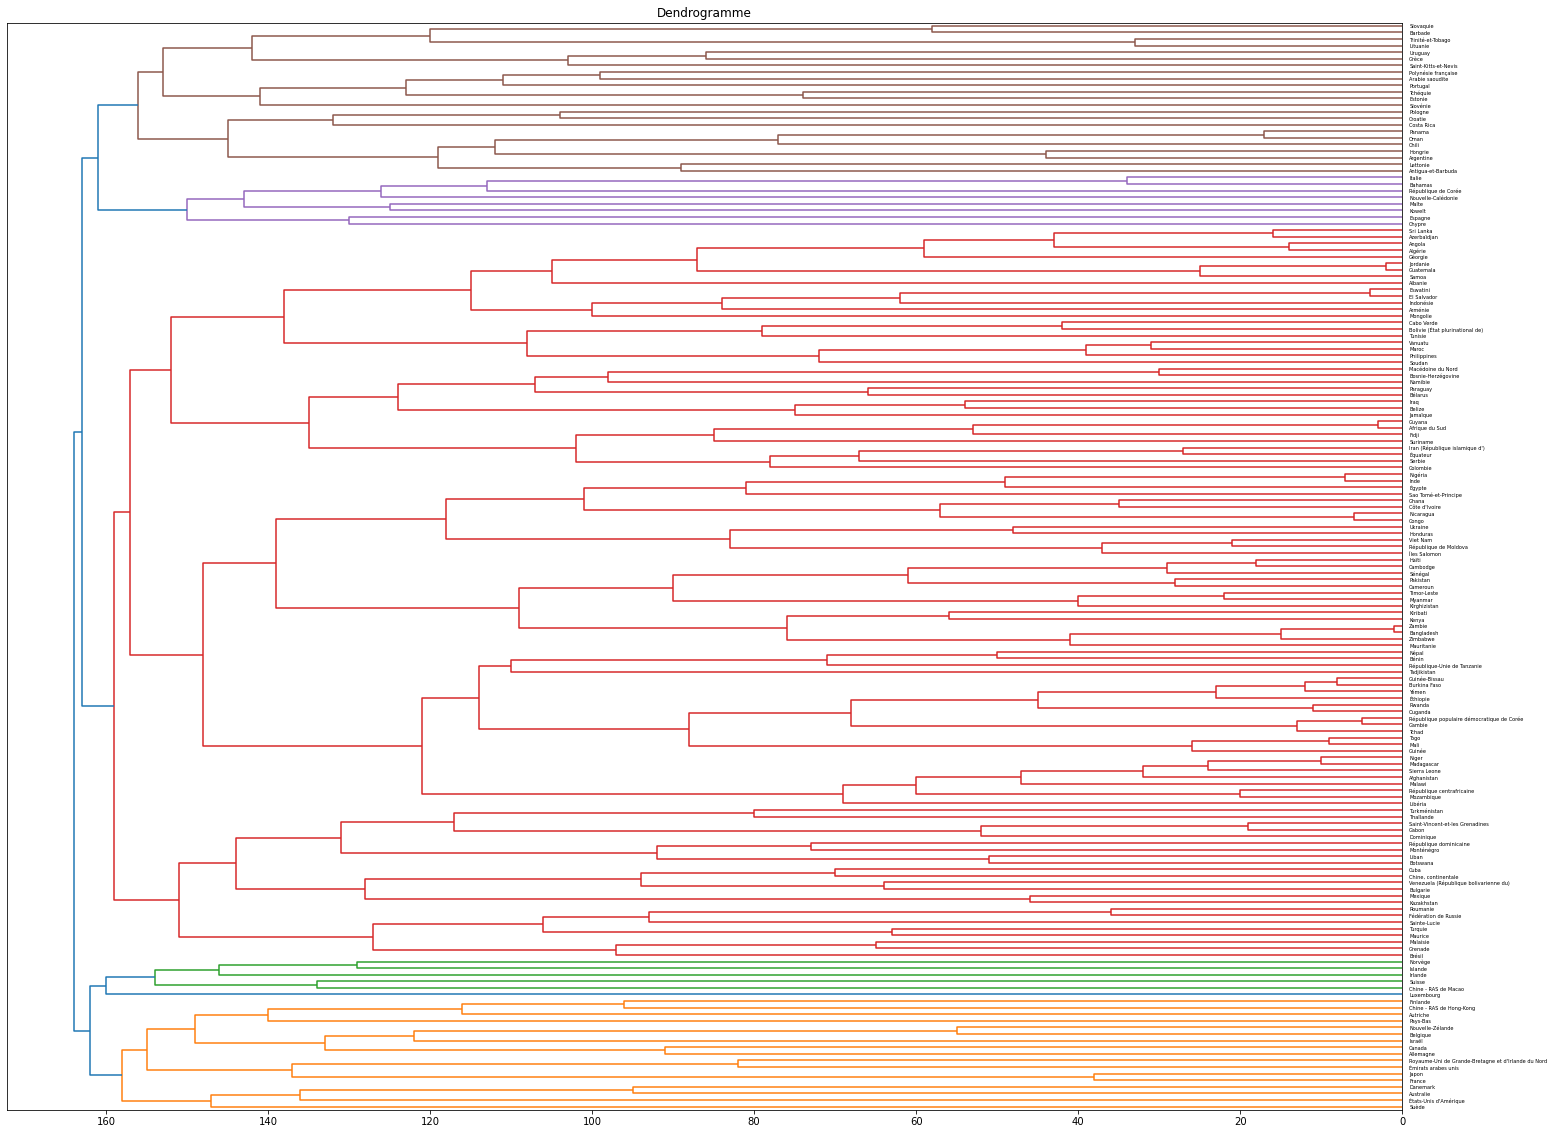

In [22]:
# Creation du dendrogramme:
ward = AgglomerativeClustering(linkage='ward',compute_full_tree=True).fit(Complet_df)

dendro = [ ]
for a,b in ward.children_:
    dendro.append([a, b, float(len(dendro)+1), len(dendro)+1])

# Dendrogramme avec clusters en couleurs:
plt.figure(figsize=(25, 20))
dendrogram(dendro,color_threshold=160,labels=list(Complet_df.index),
           show_leaf_counts=True,orientation="left")
plt.title("Dendrogramme")

le Dendrogramme:  on dertemine  le nombre de cluster idéal en fonction de la répartition des noeuds,on aurait ici 5 clusters

In [23]:
Complet_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, Afghanistan to Zimbabwe
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PIB/hab                    165 non-null    float64
 1   Indice_prod_viande_poulet  165 non-null    float64
 2   Dispo_int_volaille t/hab   165 non-null    float64
 3   import_volaille t/hab      165 non-null    float64
 4   production_volaille t/hab  165 non-null    float64
dtypes: float64(5)
memory usage: 7.7+ KB


In [24]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=5)
pca.fit(X_scaled)

PCA(n_components=5)

In [25]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.39728754 0.24147792 0.19332151 0.14627935 0.02163369]
1.0000000000000002


pca.explained_variance_ratio_ nous donne le pourcentage de variance expliquée par chacune des composantes.


La première composante explique environ 39.72% de la variance observée dans les données, et la deuxième 24.14 %. Au total, de l'ensemble des composantes expliquent 100 % de la variance totale.

*En statistique et en théorie des probabilités, la variance est une mesure de la dispersion des valeurs d'un échantillon ou d'une distribution de probabilité.*

In [26]:
from sklearn.decomposition import PCA

mypca = PCA(n_components=5) # On paramètre ici pour ne garder que 5 composantes

# Modèle d'ACP

mypca.fit(X)

# Pourcentage de la variance expliquée par chacune des composantes sélectionnées.

print(mypca.singular_values_) # Valeurs de variance

print(mypca.explained_variance_ratio_) #  Pourcentages

# Axes principaux dans l'espace des caractéristiques, représentant les directions de la variance maximale dans les données. Les composantes sont triées par variance expliquée.

print(mypca.components_) # 

# Résultats de l'ACP

data_sortie= mypca.fit_transform(X)

# Bruit estimé lié à la covariance

print(mypca.noise_variance_)

[2.51699438e+05 6.22586762e+02 2.87347879e-01 2.44751881e-01
 7.72260796e-02]
[9.99993882e-01 6.11832600e-06 1.30331334e-12 9.45550928e-13
 9.41371025e-14]
[[ 9.99999996e-01 -8.45271097e-05  2.96140588e-07  2.18655637e-07
   2.74128666e-07]
 [ 8.45271383e-05  9.99999994e-01 -5.18980580e-05 -4.12334551e-05
  -1.58952566e-05]
 [-3.94872784e-07  6.75697443e-05  7.10850892e-01  6.88383575e-01
   1.44288111e-01]
 [ 2.07928089e-07 -8.77263174e-06 -3.02597654e-01  4.84512991e-01
  -8.20781226e-01]
 [-8.16800297e-08 -1.90809637e-06 -6.34921780e-01  5.39791824e-01
   5.52719748e-01]]
0.0


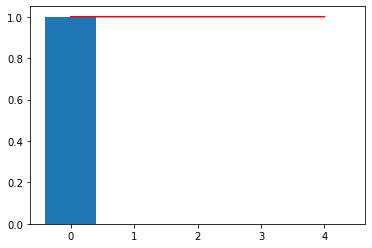

In [27]:
y = list(mypca.explained_variance_ratio_)

x = range(len(y))

ycum = np.cumsum(y)

plt.bar(x,y)

plt.plot(x,ycum,"-r")

plt.show()

In [28]:
def pareto(data) :

    from matplotlib.ticker import PercentFormatter

    import numpy as np

    y = list(data)

    x = range(len(data))

    ycum = np.cumsum(y)/sum(y)*100

    fig, ax = plt.subplots()

    ax.bar(x,y,color="yellow")

    ax2 = ax.twinx()

    ax2.plot(x,ycum, color="C1", marker="D", ms=7)

    ax2.axhline(y=80,color="r")

    ax2.yaxis.set_major_formatter(PercentFormatter())

    ax.tick_params(axis="y", colors="C0")

    ax2.tick_params(axis="y", colors="C1")

    plt.ylim(0,110)

    plt.show()

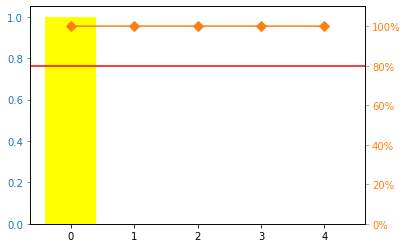

In [29]:
pareto(mypca.explained_variance_ratio_)

Le principe de Pareto, aussi appelé loi de Pareto, principe des 80-20 ou encore loi des 80-20, est une observation selon laquelle environ 80 % des effets sont le produit de seulement 20 % des causes. 

<AxesSubplot:>

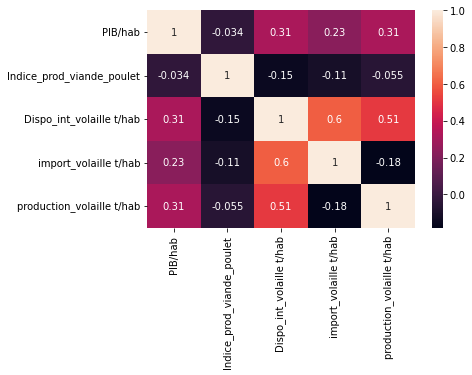

In [30]:
import seaborn as sns
# heatmap de corrélations entre les différentes variables
sns.heatmap(Complet_df.corr(), annot=True)

In [31]:
# Selectionner les valeurs à utiliser pour notre analyse
X = Complet_df.values
#Centrage / réduction des données pour que nos données puissent prendre la même importance
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
#Clustering hiérarchique: création d'une Matrice des liens selon la Méthode de Ward
Z = linkage(X_scaled, method = 'ward', metric='euclidean')

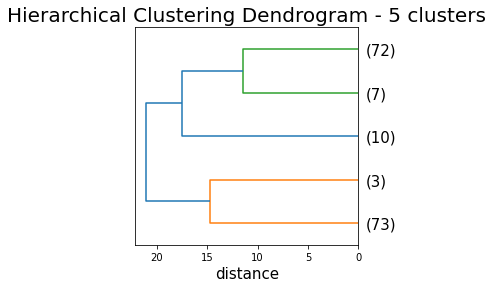

In [32]:
#Découpage du dendrogramme en 5 groupes pour avoir une première idée du partitionnement
fig = plt.figure(figsize=(4,4))
plt.title('Hierarchical Clustering Dendrogram - 5 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)
dendrogram(Z, labels = Complet_df.index, p=5, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.show()

In [33]:
#Identification des 5 groupes obtenus
groupes_cah = fcluster(Z, 5, criterion='maxclust')
#index triés des groupes
idg = np.argsort(groupes_cah)
#Affichage des pays selon leurs groupes
df = pd.DataFrame(Complet_df.index[idg], groupes_cah[idg]).reset_index()
df2 = df.rename(columns={'index':'Groupe'})
df2.head()

,Groupe,Zone
0,1,Afghanistan
1,1,Mozambique
2,1,Monténégro
3,1,Mongolie
4,1,Mauritanie


In [34]:
#Intégration des références des groupes dans notre échantillon de départ représenté par le dataframe "Complet_df"
#Jointure interne nécessaire pour parvenir à agréger nos données
df3 = pd.merge(Complet_df, df2, on='Zone')
df3.set_index('Zone', inplace=True)
df3.head()

,PIB/hab,Indice_prod_viande_poulet,Dispo_int_volaille t/hab,import_volaille t/hab,production_volaille t/hab,Groupe
Zone,,,,,,
Afghanistan,520.616409,73.03,0.001570,0.000799,0.000771,1
Afrique du Sud,6121.876572,97.12,0.037152,0.009016,0.029241,5
Albanie,4514.204908,157.14,0.016296,0.013175,0.004507,1
Algérie,4109.696001,103.17,0.006693,0.000048,0.006644,1
Allemagne,44651.829102,99.19,0.021038,0.010187,0.018316,5


<Figure size 504x504 with 0 Axes>

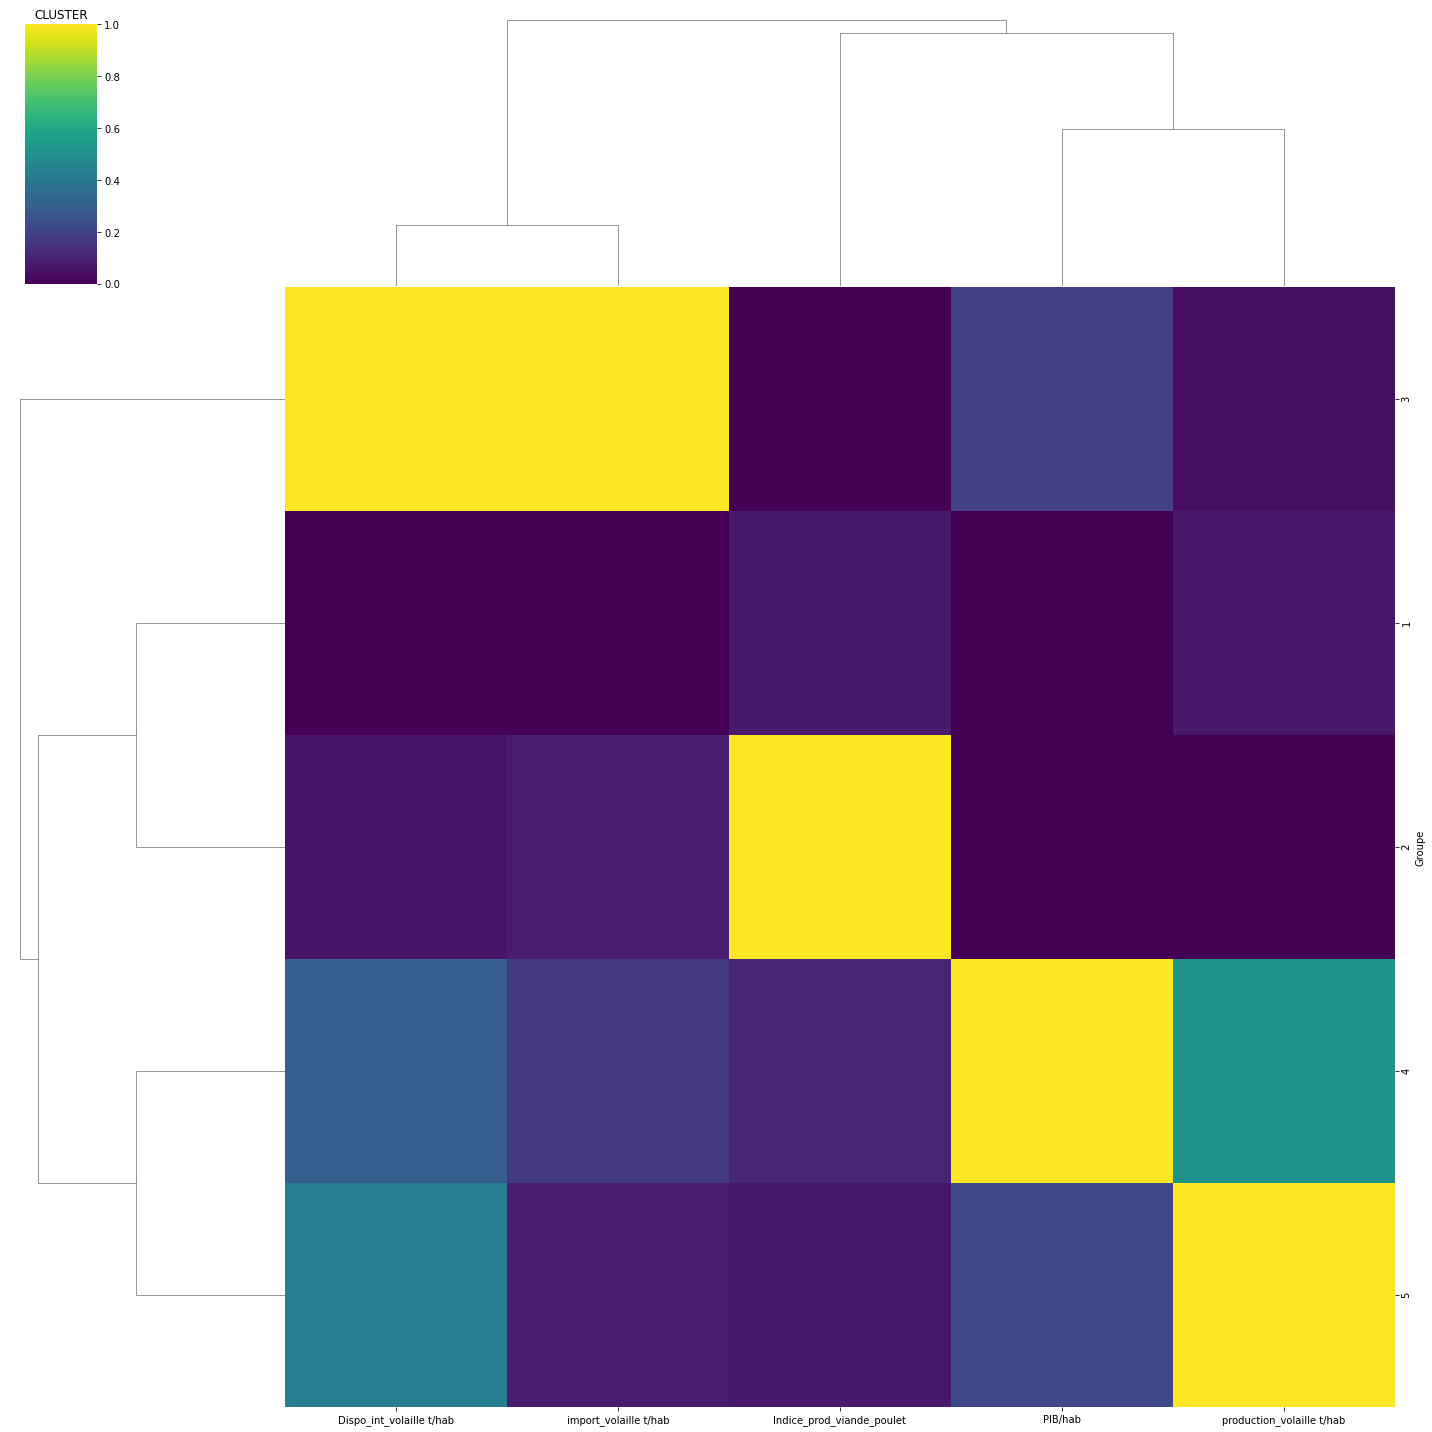

In [35]:
#heatmap avec les croisements entre les clusters de pays et les différentes variables
plt.figure(figsize=(7, 7))
sns.clustermap(df3.groupby('Groupe').mean(), cmap = 'viridis',method = 'ward',metric = 'euclidean',standard_scale =1,figsize = (20, 20))
plt.title('CLUSTER')
plt.savefig('Heatmap Cluster.jpg')

In [36]:
#afficher les moyennes des variables de chaque groupe
groupe=(1,2,3,4,5)
for n in groupe:
    affi=df3.loc[df3['Groupe']==n].mean()
    print(affi)

PIB/hab                      3149.008642
Indice_prod_viande_poulet     108.465890
Dispo_int_volaille t/hab        0.007583
import_volaille t/hab           0.004133
production_volaille t/hab       0.004472
Groupe                          1.000000
dtype: float64
PIB/hab                      3375.700407
Indice_prod_viande_poulet     406.493333
Dispo_int_volaille t/hab        0.010706
import_volaille t/hab           0.009412
production_volaille t/hab       0.002846
Groupe                          2.000000
dtype: float64
PIB/hab                      17465.828702
Indice_prod_viande_poulet       86.096000
Dispo_int_volaille t/hab         0.064952
import_volaille t/hab            0.073489
production_volaille t/hab        0.003717
Groupe                           3.000000
dtype: float64
PIB/hab                      79007.406961
Indice_prod_viande_poulet      121.098571
Dispo_int_volaille t/hab         0.024294
import_volaille t/hab            0.015992
production_volaille t/hab        0.016840
G

CARACTERISTIQUES DE CHAQUE GROUPE

GROUPE 1
Ce groupe inclus essentiellement des pays avec :

Un PIB le plus faible
Un Indice production de viande de poulet assez faible des 5 groupes
Une Disponibilité intérieur en volaille t/hab un des plus faibles
Une Importation t/hab un des plus faible
Une production de volaille t/hab un des plus faible


GROUPE 2
Ce groupe inclus essentiellement des pays avec :

Un PIB le plus faible
Un Indice production de viande de poulet le plus élevé des 5 groupes
Une Disponibilité intérieur en volaille t/hab un des plus faibles
Une Importation t/hab un des plus faibles
Une production de volaille t/hab un des plus faible

GROUPE 3
Ce groupe inclus essentiellement des pays avec :

Un PIB assez important
Un Indice production de viande de poulet assez faible des 5 groupes
Une Disponibilité intérieur en volaille t/hab un des plus élevés
Une Importation t/hab un des plus élevés
Une production de volaille t/hab un des plus faibles des 5 groupes

GROUPE 4
Ce groupe inclus essentiellement des pays avec :

Un PIB assez important le plus élevé
Un Indice production de viande de poulet un des plus élevés
Un Disponibilité intérieur en volaille t/hab un des plus élevés
Une Importation t/hab un des plus élevés
Une production de volaille t/hab un des plus élevés

GROUPE 5
Ce groupe inclus essentiellement des pays avec :

Un PIB un des plus élevés
Un Indice production de viande de poulet un des plus faibles
Une Disponibilité intérieur en volaille t/hab un des plus élevés
Une Importation t/hab un des plus faible
Une production de volaille t/hab le plus élevés des 5 groupes

OBSERVATIONS
Un groupe présente des caractéristiques intéressantes pour notre objectif d'exportation :

LE GROUPE 3
Au vu des caractéristiques de chaque groupe la combinaison la plus favorable à la selection du meilleur groupe en terme de besoin de viande de volaille met en avant le groupe numéro 3 :

PIB/hab                      17465.828702

Indice_prod_viande_poulet       86.096000

Dispo_int_volaille t/hab         0.064952

import_volaille t/hab            0.073489

production_volaille t/hab        0.003717

L'importation est très élevé contrairement à la production qui est très bas.




In [37]:
# Cluster 3
cluster_3=df3.loc[df3['Groupe']==3]
cluster_3.shape[0]

10

In [38]:
cluster_3

,PIB/hab,Indice_prod_viande_poulet,Dispo_int_volaille t/hab,import_volaille t/hab,production_volaille t/hab,Groupe
Zone,,,,,,
Antigua-et-Barbuda,15383.415188,60.94,0.073355,0.073355,0.000000,3
Bahamas,32376.129780,98.19,0.068107,0.062868,0.015717,3
Chine - RAS de Hong-Kong,46705.027813,97.71,0.038323,0.124139,0.003285,3
Dominique,7286.797839,97.43,0.055977,0.055977,0.000000,3
Grenade,10152.832812,101.57,0.072154,0.063135,0.009019,3
Polynésie française,21127.527814,121.84,0.054328,0.054328,0.003622,3
Sainte-Lucie,11034.684894,95.50,0.060789,0.055263,0.005526,3
Saint-Kitts-et-Nevis,19155.431731,1.27,0.076857,0.076857,0.000000,3
Saint-Vincent-et-les Grenadines,7212.960181,100.52,0.072842,0.081947,0.000000,3


Ce cluster est composé de plusieurs pays lointain principalement des iles l'export vers ces pays risque d'être compliqué. on choisira le deuxième cluster qui a la combinaison favorable à la sélection du meilleur groupe en terme de besoin de viande de volaille le groupe 4

PIB/hab                      79007.406961

Indice_prod_viande_poulet      121.098571

Dispo_int_volaille t/hab         0.024294

import_volaille t/hab            0.015992

production_volaille t/hab        0.016840



Un PIB assez important Un Indice production de viande de poulet assez faible des 5 groupes Une Disponibilité intérieur en volaille t/hab un des plus élevés Une Importation t/hab un des plus élevé Une production de volaille t/hab un des plus élevés

In [39]:
#cluster_1 =cluster_1.drop('Groupe', axis = 1)

In [40]:
# Cluster 4
cluster_4=df3.loc[df3['Groupe']==4]
cluster_4.shape[0]

7

In [41]:
cluster_4

,PIB/hab,Indice_prod_viande_poulet,Dispo_int_volaille t/hab,import_volaille t/hab,production_volaille t/hab,Groupe
Zone,,,,,,
Chine - RAS de Macao,81043.968656,123.79,0.030518,0.036943,0.004819,4
Danemark,57938.797728,99.20,0.029133,0.023202,0.030180,4
Irlande,70568.302444,146.12,0.026929,0.020828,0.023142,4
Islande,73949.769216,114.59,0.029905,0.005981,0.029905,4
Luxembourg,111017.182246,155.40,0.018584,0.018584,0.000000,4
Norvège,75220.814442,103.74,0.019259,0.000378,0.019070,4
Suisse,83313.013992,104.85,0.015729,0.006031,0.010762,4


In [42]:
x = cluster_4.values
x

array([[8.10439687e+04, 1.23790000e+02, 3.05179212e-02, 3.69427468e-02,
        4.81861914e-03, 4.00000000e+00],
       [5.79387977e+04, 9.92000000e+01, 2.91332899e-02, 2.32019614e-02,
        3.01799949e-02, 4.00000000e+00],
       [7.05683024e+04, 1.46120000e+02, 2.69287791e-02, 2.08277276e-02,
        2.31419195e-02, 4.00000000e+00],
       [7.39497692e+04, 1.14590000e+02, 2.99049322e-02, 5.98098644e-03,
        2.99049322e-02, 4.00000000e+00],
       [1.11017182e+05, 1.55400000e+02, 1.85839063e-02, 1.85839063e-02,
        0.00000000e+00, 4.00000000e+00],
       [7.52208144e+04, 1.03740000e+02, 1.92586332e-02, 3.77620260e-04,
        1.90698231e-02, 4.00000000e+00],
       [8.33130140e+04, 1.04850000e+02, 1.57288414e-02, 6.03136023e-03,
        1.07618389e-02, 4.00000000e+00]])

In [43]:
names = cluster_4.index
names

Index(['Chine - RAS de Macao', 'Danemark', 'Irlande', 'Islande', 'Luxembourg',
       'Norvège', 'Suisse'],
      dtype='object', name='Zone')

In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
X_scaled = scaler.fit_transform(x)
n_components = 5
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=5)

In [45]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()



In [46]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [47]:
features = cluster_4.columns

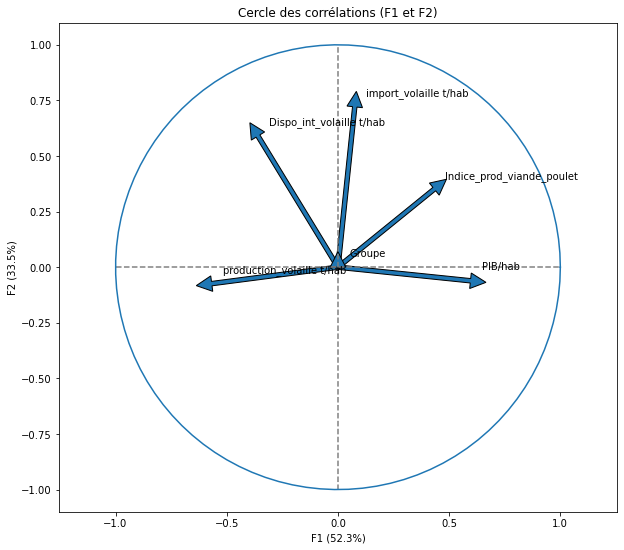

In [48]:
x_y = [0,1]
correlation_graph(pca,x_y, features)

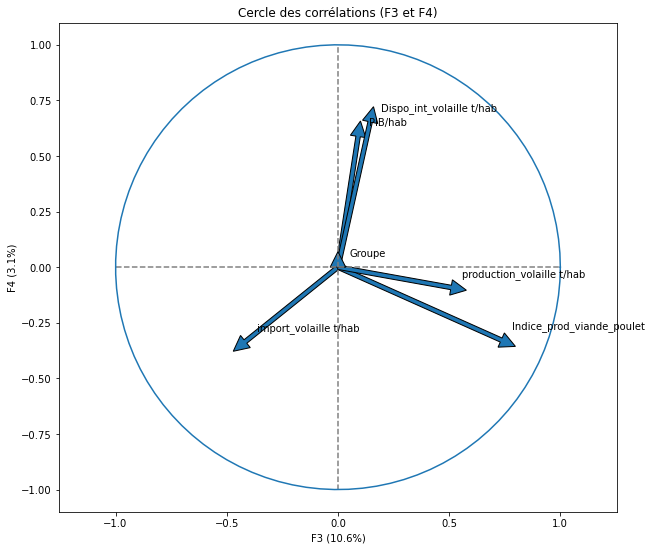

In [49]:
correlation_graph(pca, (2,3), features)

In [50]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[ 4.99471269e-01,  2.04305249e+00, -1.02907812e+00,
         2.44499926e-01, -1.65547789e-01],
       [-2.23596824e+00,  5.56794721e-01, -4.37726951e-01,
        -2.32014318e-01,  2.80065112e-01],
       [-2.56053785e-01,  9.90856478e-01,  1.03665621e+00,
        -6.21625971e-01, -1.36432948e-01],
       [-1.42243181e+00, -2.19117651e-01,  8.30983115e-01,
         7.22696630e-01, -3.95815194e-04],
       [ 3.22784555e+00,  1.49291849e-01,  4.20720621e-01,
         1.08263625e-01,  1.85494725e-01]])

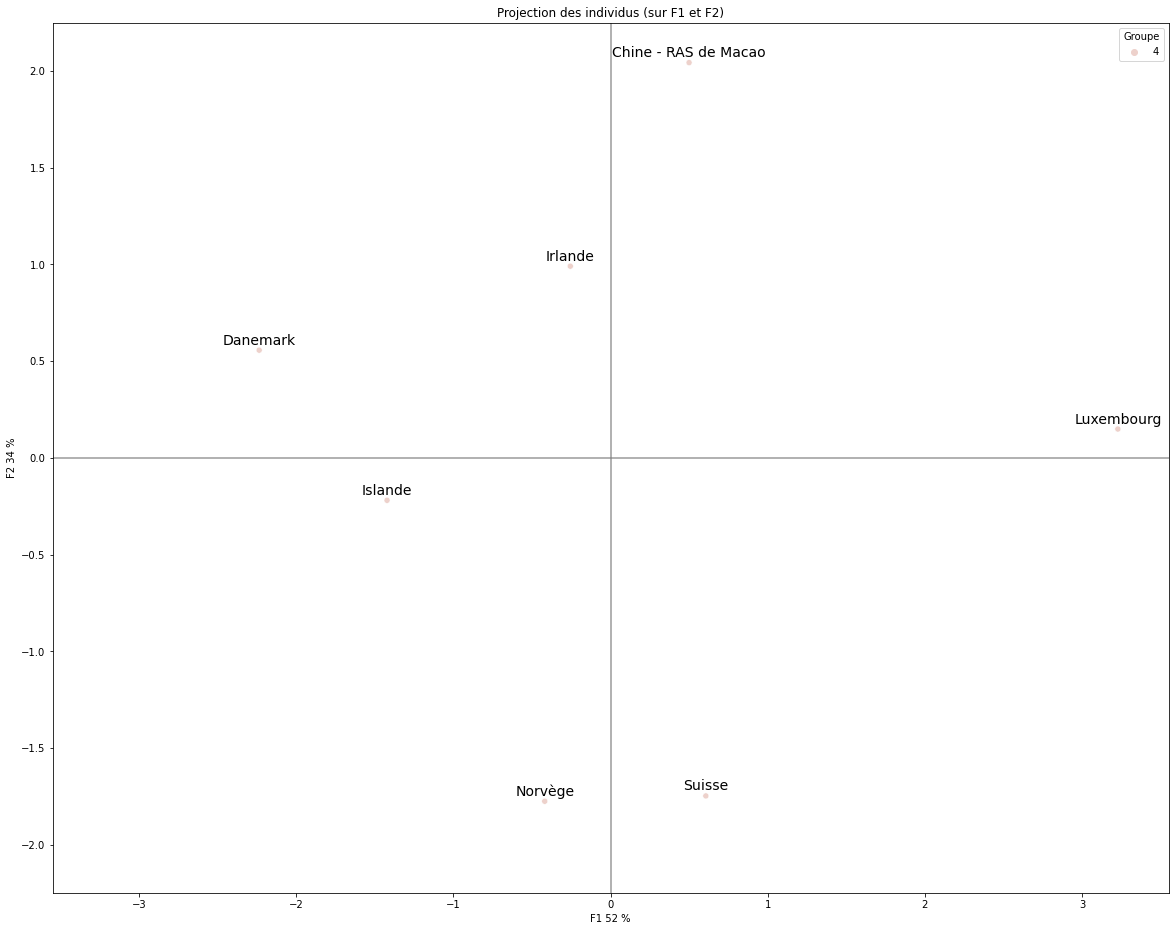

In [51]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), clusters=cluster_4['Groupe'], marker="o")

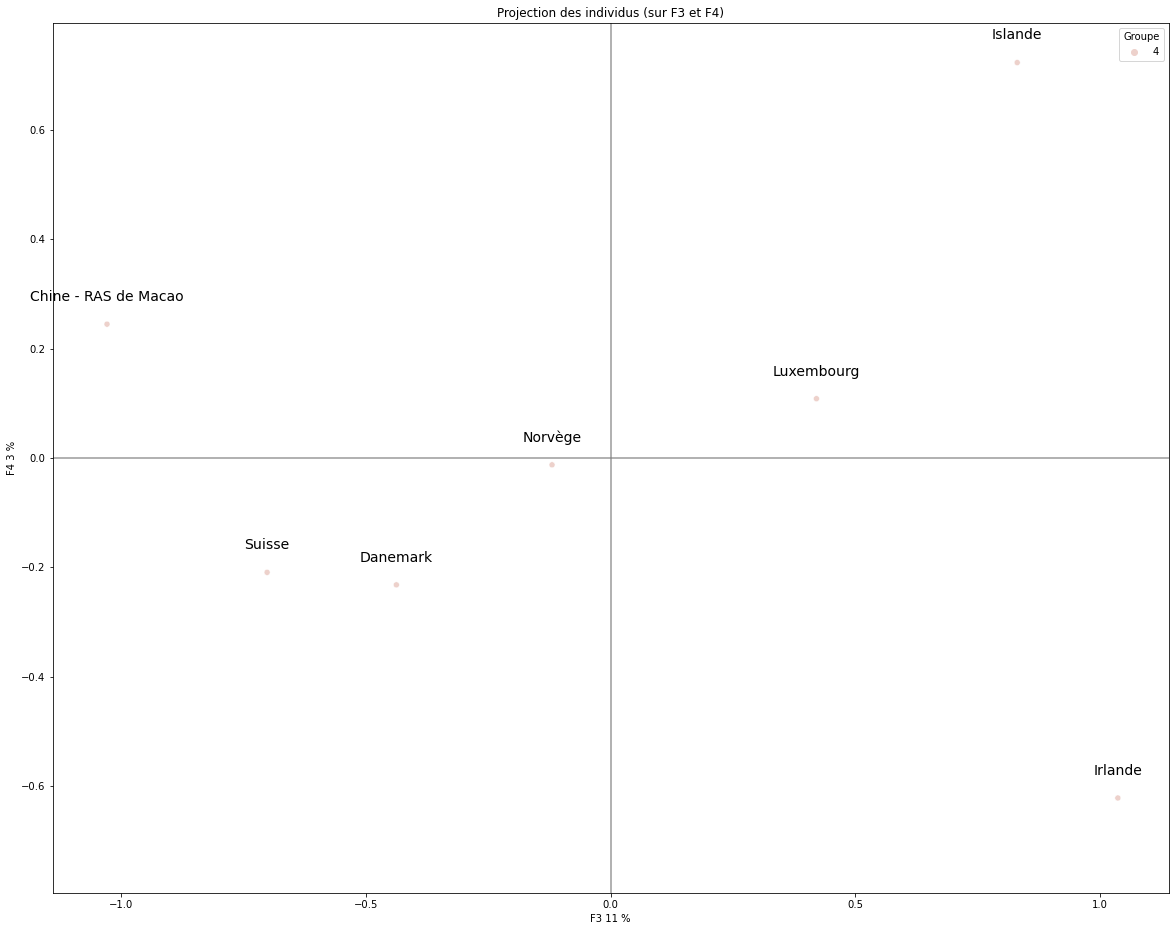

In [52]:
x_y = 2,3
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), clusters=cluster_4['Groupe'], marker="o")

CONCLUSION

Le groupe de pays qui correspond en terme de besoins en viande de volaille est le groupe 3, mais comme ce sont des îles nous avons choisi pour le groupe 4


- Norvège
- Danemark
- Suisse